# review_ML/DL

* 다음의 데이터를 이용하여 모델링 복습을 해 봅시다.
    * 데이터와 기본 라이브러리만 작성되어 있습니다.
    * 전처리와 모델링의 틀을 제공합니다.
    * 여러분이 가장 자신 있는 알고리즘을 이용하여 모델링하시오.
        * 가능하다면 튜닝도 시도하시오.
    * 성능 평가를 합니다.

## 1.환경준비

### 1) 라이브러리 로딩

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2) 데이터 로딩

In [45]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_all.csv'
data = pd.read_csv(path)
data.loc[data['Payment'] == 4, 'Payment'] = 3
data.head()

,Creditability,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuableAsset,Age,Apartment,CreditCount,Occupation,Dependents,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28,2,1,3,1,1,1
1,1,2,9,2,0,276,3,4,4,1,22,1,1,2,1,1,1
2,1,1,18,3,2,1049,2,2,4,2,21,1,1,3,1,1,1
3,1,1,24,3,1,6419,5,2,4,4,44,3,2,4,2,2,1
4,1,3,12,2,2,1424,5,2,4,1,55,2,1,4,1,2,1


|	칼럼명	|	설명	|	 	|	값 의미	|
|	-----	|	-----	|	-----	|	-----	|
|	Creditability	|	Creditability(Target)	|	향후 신용도	|	0 : Bad, 1 : Good	|
|	AccountBalance	|	Account Balance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	Duration	|	Duration of Credit (month)	|	신청한 대출기간(월)	|	숫자	|
|	Payment	|	Payment Status of Previous Credit	|	과거 대출 납입 상태	|	0 : 연체, 1 : 기타신용, 2 : 완납, 3 : 정상 대출상환 중 |
|	Purpose	|	Purpose	|	신청한 대출목적	|	1 : New Car , 2 : Used Car , 3 : Furniture , 4 : TV , 5 : Appliances , 6 : Repair , 8 : Vacation , 9 :Retraining , 10 : Business , 0 : Other	|
|	CreditAmount	|	Credit Amount($)	|	신청한 대출금액	|		|
|	Employment	|	Length of current employment(Month)	|	현 직업 근무 기간	|	1: Unemployed,  2: <1 Year,  3: [1, 4),  4: [4, 7),  5: Above 7	|
|	SexMarital	|	Sex & Marital Status	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single , 3: Male, Married/Widowed , 4: Female	|
|	CurrentAddress	|	Duration in Current address	|	현 거주지 거주기간	|	1: <1 Year , 2: [1, 4) , 3: [4, 7) , 4: Above 7	|
|	MostValuable	|	Most valuable available asset	|	가장 가치있는 자산	|	1: None , 2: Car , 3: Life Insurance , 4: Real Estate	|
|	Age	|	Age (years)	|	나이	|		|
|	AppartmentType	|	Type of apartment	|	주거환경	|	1: free apartment, 2: Rented, 3: Owned	|
|	NoCredits	|	No of Credits at this Bank	|	현재 총 대출 건수	|	1 : one, 2 : 2 ~ 3, 3 : 4 ~ 5, 4 : 6 ~	|
|	Occupation	|	Occupation	|	직업	|	1: Unemployed, unskilled, 2: Unskilled Permanent Resident, 3: Skilled, 4: Executive	|
|	Telephone	|	Telephone	|	전화기 소유 여부	|	2: Yes , 1: No	|
|	ForeignWorker	|	Foreign Worker	|	외국인 근로자 여부	|	2: Yes , 1: No	|


* Target : Creditability
* 숫자형변수 : Duration, CreditAmount, Age
* 범주형변수 : 나머지

## 2.데이터 준비


### 1) x, y로 나누기 

In [46]:
y = data['Creditability']
x = data.iloc[:,1:]

### 2) 가변수화

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Creditability      1000 non-null   int64
 1   AccountBalance     1000 non-null   int64
 2   Duration           1000 non-null   int64
 3   Payment            1000 non-null   int64
 4   Purpose            1000 non-null   int64
 5   CreditAmount       1000 non-null   int64
 6   Employment         1000 non-null   int64
 7   SexMarital         1000 non-null   int64
 8   CurrentAddress     1000 non-null   int64
 9   MostValuableAsset  1000 non-null   int64
 10  Age                1000 non-null   int64
 11  Apartment          1000 non-null   int64
 12  CreditCount        1000 non-null   int64
 13  Occupation         1000 non-null   int64
 14  Dependents         1000 non-null   int64
 15  Telephone          1000 non-null   int64
 16  ForeignWorker      1000 non-null   int64
dtypes: int64(17)
me

In [48]:
for i in data.columns.values[1:]:
  if data[i].nunique()>10:
    print(i)

Duration
CreditAmount
Age


In [49]:
cols1 = ['Duration','CreditAmount','Age']
cols2 = [x for x in list(x) if x not in cols1]

In [50]:
x = pd.get_dummies(x, columns = cols2, drop_first=True)

In [51]:
x.head()

,Duration,CreditAmount,Age,AccountBalance_2,AccountBalance_3,Payment_1,Payment_2,Payment_3,Purpose_1,Purpose_2,...,Apartment_3,CreditCount_2,CreditCount_3,CreditCount_4,Occupation_2,Occupation_3,Occupation_4,Dependents_2,Telephone_2,ForeignWorker_2
0,24,1249,28,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,9,276,22,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,18,1049,21,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,24,6419,44,0,0,0,0,1,1,0,...,1,1,0,0,0,0,1,1,1,0
4,12,1424,55,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0


### 3) train : validation 분할

In [52]:
x.shape

(1000, 41)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x,y , test_size=0.25)

In [54]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((750, 41), (250, 41), (750,), (250,))

### 4) 스케일링

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## 3.모델링
* 최소 3가지의 알고리즘을 이용하여 모델링을 수행하시오.
* 튜닝을 시도하시오.
* validation 셋으로 예측결과를 저장하시오.

In [62]:
# 사용될 라이브러리, 함수 로딩
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression

### 1) 모델1

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
rf_model = RandomForestClassifier(random_state=1)
score1 = cross_val_score(rf_model, X_train, y_train, cv=5)
score1.mean()

0.756

In [59]:
K_model = KNeighborsClassifier()
score2 = cross_val_score(K_model, X_train, y_train, cv=5)
score2.mean()

0.7040000000000001

In [60]:
LGB_model = LGBMClassifier(random_state=1)
score3 = cross_val_score(LGB_model, X_train, y_train, cv=5)
score3.mean()

0.7346666666666667

In [63]:
XGB_model = XGBClassifier()
score4 = cross_val_score(XGB_model, X_train, y_train, cv=5)
score4.mean()

0.7413333333333333

In [61]:
L_model = LinearRegression()
score5 = cross_val_score(L_model, X_train, y_train, cv=5)
score5.mean()

0.14720730483818184

### 2) Grid Search

In [64]:
from sklearn.model_selection import GridSearchCV

In [94]:
params = {"max_depth": range(50, 201, 50),
                   "n_estimators": range(100, 1000,100)
                   }

grid_rfc = GridSearchCV(rf_model, param_grid=params, cv=3, refit=True)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': range(50, 201, 50),
                         'n_estimators': range(100, 1000, 100)})

In [95]:
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'max_depth': 50, 'n_estimators': 300}
0.7506666666666666


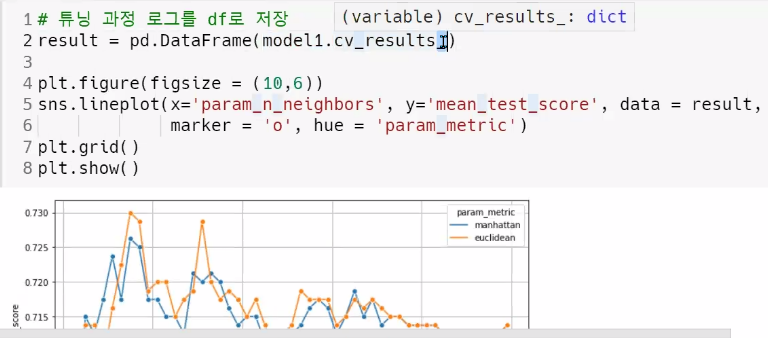

In [96]:
result = pd.DataFrame(grid_rfc.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.272532,0.067303,0.019929,0.007407,50,100,"{'max_depth': 50, 'n_estimators': 100}",0.752,0.748,0.720,0.740000,0.014236,29
1,0.401541,0.006857,0.028173,0.000120,50,200,"{'max_depth': 50, 'n_estimators': 200}",0.772,0.740,0.728,0.746667,0.018571,17
2,0.615216,0.008039,0.045605,0.001258,50,300,"{'max_depth': 50, 'n_estimators': 300}",0.772,0.748,0.732,0.750667,0.016438,1
3,0.849662,0.012403,0.069196,0.012602,50,400,"{'max_depth': 50, 'n_estimators': 400}",0.760,0.744,0.736,0.746667,0.009978,17
4,1.222697,0.275660,0.079306,0.010083,50,500,"{'max_depth': 50, 'n_estimators': 500}",0.760,0.736,0.724,0.740000,0.014967,29


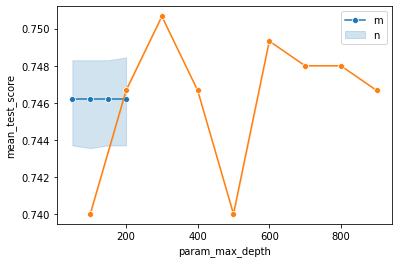

In [97]:
import seaborn as sns
sns.lineplot(x='param_max_depth', y='mean_test_score', data=result, marker='o')
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=result, marker='o')
plt.legend(['m','n'])
plt.show()

<BarContainer object of 41 artists>

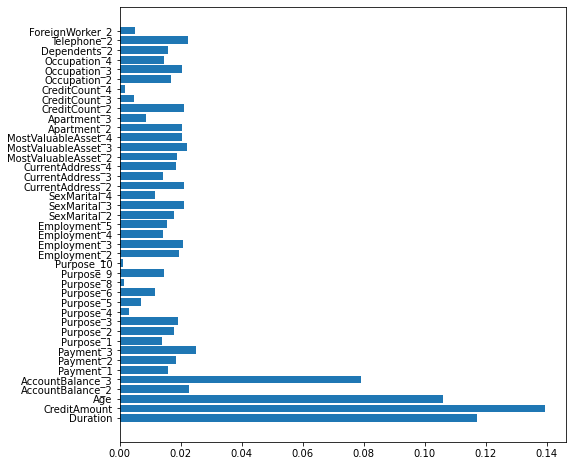

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.barh(y=list(x), width=grid_rfc.best_estimator_.feature_importances_)

### 2) Grid Search2

{'learning_rate': 1.1, 'max_depth': 50}
0.7293333333333333


<BarContainer object of 41 artists>

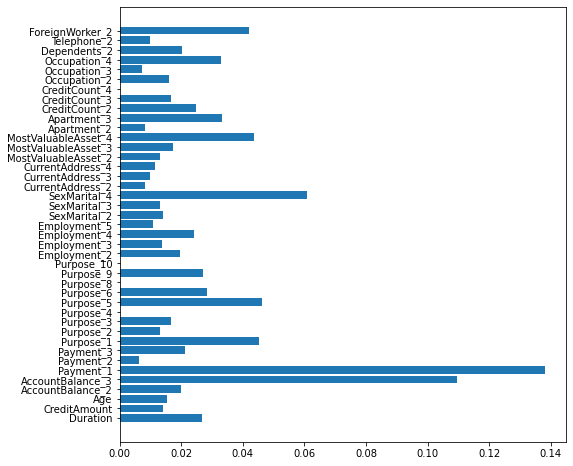

In [78]:
params = {"max_depth": range(50, 201, 50),
                   "learning_rate": [0.1,0.6,1.1,2.0]
                   }

grid_xgb = GridSearchCV(XGB_model, param_grid=params, cv=3, refit=True)

grid_xgb.fit(X_train, y_train)

print(grid_xgb.best_params_)
print(grid_xgb.best_score_)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.barh(y=list(x), width=grid_xgb.best_estimator_.feature_importances_)

{'learning_rate': 0.1, 'max_depth': 50}
0.7453333333333333


<BarContainer object of 41 artists>

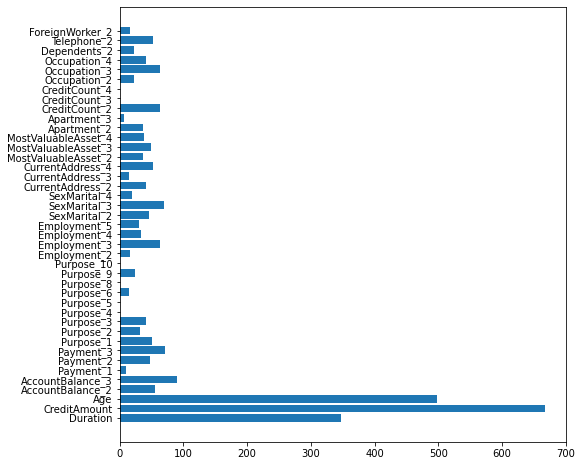

In [79]:
params = {"max_depth": range(50, 201, 50),
                   "learning_rate": [0.1,0.6,1.1,2.0]
                   }

grid_lgb = GridSearchCV(LGB_model, param_grid=params, cv=3, refit=True)

grid_lgb.fit(X_train, y_train)

print(grid_lgb.best_params_)
print(grid_lgb.best_score_)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.barh(y=list(x), width=grid_lgb.best_estimator_.feature_importances_)

### 4) 모델4

### 5) 모델5

## 4.모델 성능 비교
* 모델 중 성능이 가장 좋은 모델은?

In [81]:
from sklearn.metrics import *
lgb_pred = grid_lgb.predict(X_val)
xgb_pred = grid_xgb.predict(X_val)
rfc_pred = grid_rfc.predict(X_val)

print(accuracy_score(y_val, rfc_pred))
print(accuracy_score(y_val, lgb_pred))
print(accuracy_score(y_val, xgb_pred))

0.716
0.728
0.712
